In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(font_scale=1.5) 


# Instacart Transaction Analysis

## Capstone Project - Roy Shabaya

I will be performing analysis on transaction data from Instacart, a grocery delivery company.  Founded in 2012, Instacart allows its customers to place grocery orders online which are then delivered directly to their home. By sourcing the product from stores local to their customers, Instacart is best known for their one hour deliveries.   Instacart recently made available anonymized data on 3 million orders from their customers. The data contained between 4 and 100 transactions for each customer. General information about the orders was also included, including what day of the week and what time of day each purchase was made, in addition to how many days since the customers last order.  The plots used for analysis were created with either Seaborn or Pyplot.






### Data

I used the Orders file made available by Instacart, and obtained it from Kaggle.  The file contains 7 columns:



In [3]:
orders = pd.read_csv('orders.csv')
print("Order file columns, details below: ")
list(orders)

Order file columns, details below: 


['order_id',
 'user_id',
 'eval_set',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order']

#### order_id: Unique identifying number for each order

#### user_id: Unique identifying number for each customer

#### eval_set: Instacart published this data with the challenge that it be used to predict future orders.  Accordingly they segmented their data in to three groups data, prior, train, and test.  All of which are applicable to be used for this analysis.

#### order_number: Order sequence number for each customer

#### order_dow: The day of the week the order was made

#### order_hour_of_day: The hour of the day the order was made, 0-6.  Sunday assumed to be 0.

#### days_since_prior_order: The number of days since the customers last order, with a maximum of 30, and NaN for a customers first order.

All columns except eval_set where used in this analysis.

In [4]:
print("The first 15 rows are below:")
orders.head(15)

The first 15 rows are below:


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


## Analytical Questions

### How many total orders are in the data set, and how are they distributed?

In [5]:
orders["order_dow"].count()

3421083

There are 3,421,083 orders in this data set. Of those orders, which day had the most orders?

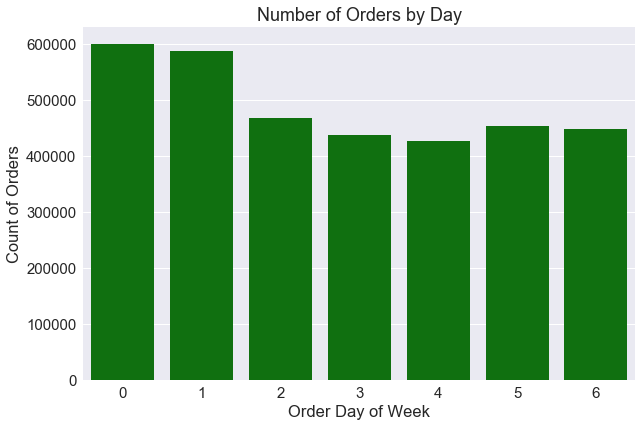

In [6]:
transactions_by_day = sns.factorplot(x="order_dow", data = orders, kind="count", color = "Green",size=6, aspect=1.5)
transactions_by_day.set_axis_labels("Order Day of Week","Count of Orders")
plt.title("Number of Orders by Day")
plt.show()

A Seaborne barplot was used to examine which day of the week has the highest number of orders.  Day 0, which most sources I found identified as Sunday, was the busiest day for orders. Monday appeared to be a close second, with the rest of the week much lower but relatively clustered together

### What hour of the day has the highest transaction volume?

We now know that there are over 3 million transactions in the data set, and that Sunday is the busiest day for orders.  It would also be important to know what time of day is the busiest.

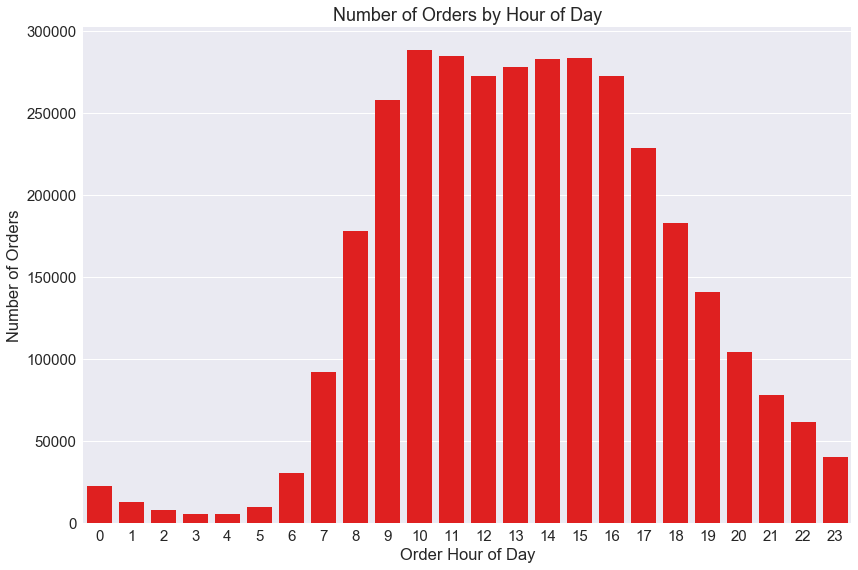

In [7]:
transactions_by_hour = sns.factorplot(x="order_hour_of_day", kind="count", data = orders,  color = "Red",size=8, aspect=1.5)
transactions_by_hour.set_axis_labels("Order Hour of Day","Number of Orders")
plt.title("Number of Orders by Hour of Day")
plt.show()

Most orders occur between 800-1800.  The single busiest hour was 1000.  This tells use the busiest hour across all days.  However to know where the absolute most resources may be needed, let's see what the busiest hours are on the busiest day, Sunday.

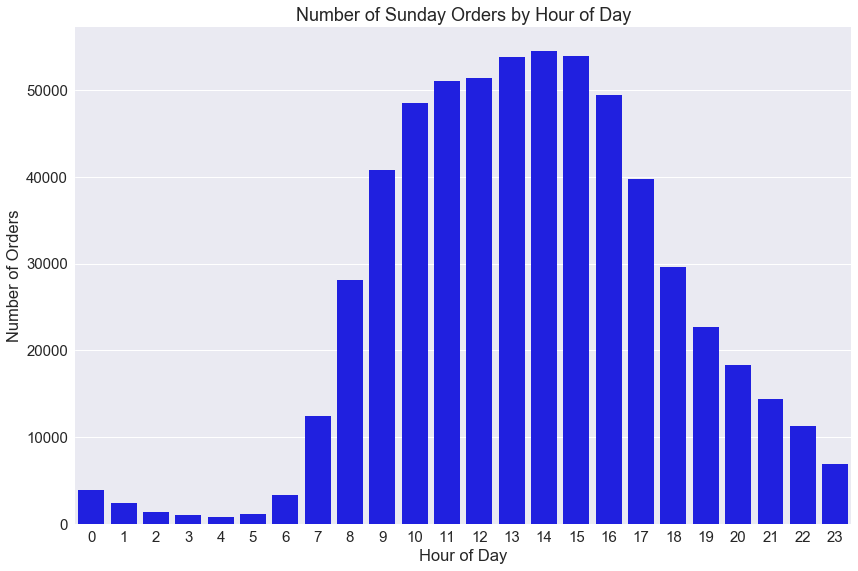

In [8]:
sunday_orders_by_hour = orders.loc[lambda df: orders["order_dow"] == 0, :]
transactions_by_hour_sunday = sns.factorplot(x="order_hour_of_day", data = sunday_orders_by_hour, kind="count", color = "Blue",size=8, aspect=1.5)
transactions_by_hour_sunday.set_axis_labels("Hour of Day","Number of Orders")
plt.title("Number of Sunday Orders by Hour of Day")
plt.show()

While 1000 was the busiest hour across all days, it appears 1400 is the busiest hour on Sunday.

### How many orders did each customer place?

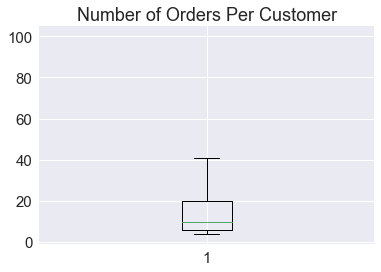

In [12]:
customer_order_count = orders.groupby("user_id").count()
final=customer_order_count["order_id"]
plt.boxplot(final)
plt.title("Number of Orders Per Customer")
plt.show()


A box plot was used to examine how many orders each customer place.  This allows us to see the median and any outliers in the extremes.  It appears the median was around 10 order per customer, with the low in single digits, and a high of 100.  Let's see a more detailed breakdown.

In [10]:
final.describe()

count    206209.000000
mean         16.590367
std          16.654774
min           4.000000
25%           6.000000
50%          10.000000
75%          20.000000
max         100.000000
Name: order_id, dtype: float64

On average 16.6 orders were placed per customer, with the median at 10, minimum 4, and maximum 100. Confirming what we approximated with the boxplot.  Now that we know how many orders each customer places, let's see how often they order.

### How many days typically pass between customers placing another order?

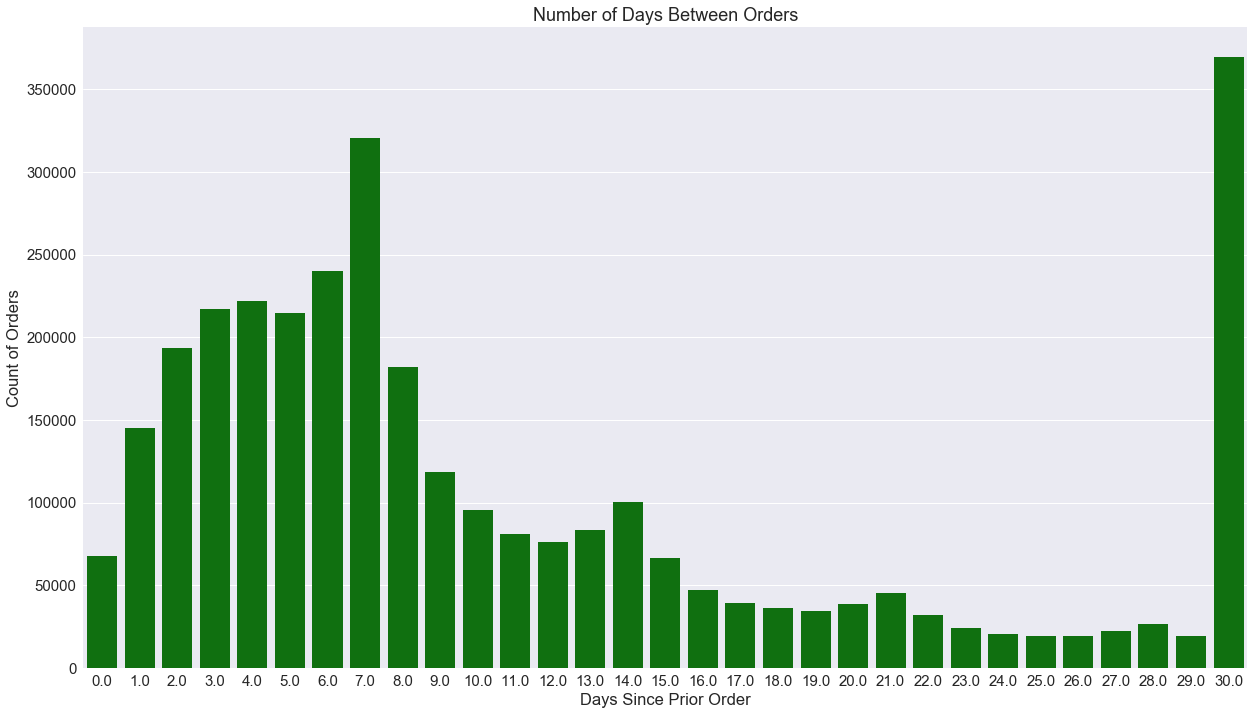

In [11]:
days_between_orders = sns.factorplot(x="days_since_prior_order", data = orders, kind="count", color = "Green",size=10, aspect=1.75)
days_between_orders.set_axis_labels("Days Since Prior Order","Count of Orders")
plt.title("Number of Days Between Orders")
plt.show()

There is a big spike in re-orders at 7 days and 30 days.  Most re-orders appear to happen after 7 days, so it appears customers tend to order frequently within the 7 day period or very infrequently at 30 days or later.  Depending on what Instacarts target re-ordering frequency is(weekly, several times a week), this data can be very useful for them to determine whether they are hitting their target.  Without knowledge of their goals, it appears they do need to do some work to determine how to increase the frequency of orders for those at the 30 day level.

## Further Research

Instacart also made data available on the details of the products on each transaction available as well.  Further research could involve looking at what departments and products are most popular.  Another interesting aspect to examine is what product or category of products is ordered most each day.  This can provide valuable information to Instacart allowing them to align their resources to fulfulling when and what customers are most likely to order.  Including being able to predict what the customers next order may be.  More advanced techniques including machine learning could help to provide even more insights, that normal standard analysis would struggle to accomplish.